## 学生成绩预测直播课作业

预测一名美国本科学生申请美国研究生院的录取几率

**注意：公开时请把标题改为该形式：学生成绩预测直播课作业 - 用户名**



In [2]:

import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./dataset/Admission_Predict.csv')

In [4]:
def change_to_categorical(x):
    if x<=0.64:
      return 'low'
    elif x>=0.83:
      return 'high'
    else:
      return 'normal'

df['Admit'] = df.apply(lambda row: change_to_categorical(row['Chance of Admit ']), axis=1)
df = df.drop(['Chance of Admit '],axis = 1)

df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,high
1,2,324,107,4,4.0,4.5,8.87,1,normal
2,3,316,104,3,3.0,3.5,8.00,1,normal
3,4,322,110,3,3.5,2.5,8.67,1,normal
4,5,314,103,2,2.0,3.0,8.21,0,normal
5,6,330,115,5,4.5,3.0,9.34,1,high
6,7,321,109,3,3.0,4.0,8.20,1,normal
7,8,308,101,2,3.0,4.0,7.90,0,normal
8,9,302,102,1,2.0,1.5,8.00,0,low
9,10,323,108,3,3.5,3.0,8.60,0,low


特征(Features)介绍：  
GRE: GRE考试分数  
TOEFL: TOEFL考试分数  
University Rating：大学相对排名   
SOP: 申请文书（Stetement of Purpose）质量评分  
LOR：推荐信（Letter of Recommendation）分量评分  
CGPA：核心课程GPA (Core GPA)  
Research: 是否有实验室研究经历 

结果(Response Variable)介绍：
Admit：该学生录取该院校的几率  
  1. Low：录取几率小于等于0.64
  2. Average: 录取几率在0.64到0.83之间
  3. High: 录取几率大于等于0.83

**请以df为数据集，进行探索性数据分析以及建立机器学习模型**

### 1. 数据集探索

In [5]:
# 数据集探索
# 数据集共有400个样例，每个样例8个特征和1个标签
df.shape

(400, 9)

In [6]:
# 检查数据集是否有空缺值
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admit                0
dtype: int64


In [7]:
# 检查每个数据的数据类型
print(df.dtypes)

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Admit                 object
dtype: object


In [8]:
df.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,NaN
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,NaN
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,NaN
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,NaN
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,NaN
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,NaN


In [9]:
# 查看标签的种类
print('Admit',df['Admit'].unique())

Admit ['high' 'normal' 'low']


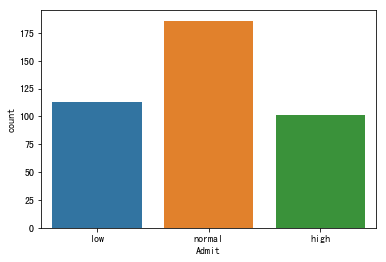

In [13]:
#检查数据集是否平衡
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Admit',order=['low','normal','high'],data=df)

### 2.数据集可视化

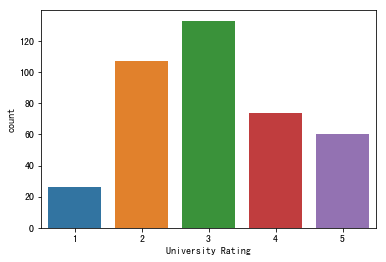

In [15]:
# 数据集可视化
# 了解University rating的分布情况
sns.countplot(x='University Rating',data=df)

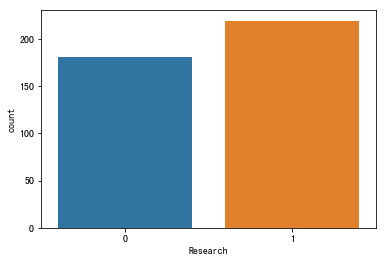

In [17]:
# 了解Research（是否有实验室研究经历）的分布情况
sns.countplot(x='Research',data=df)

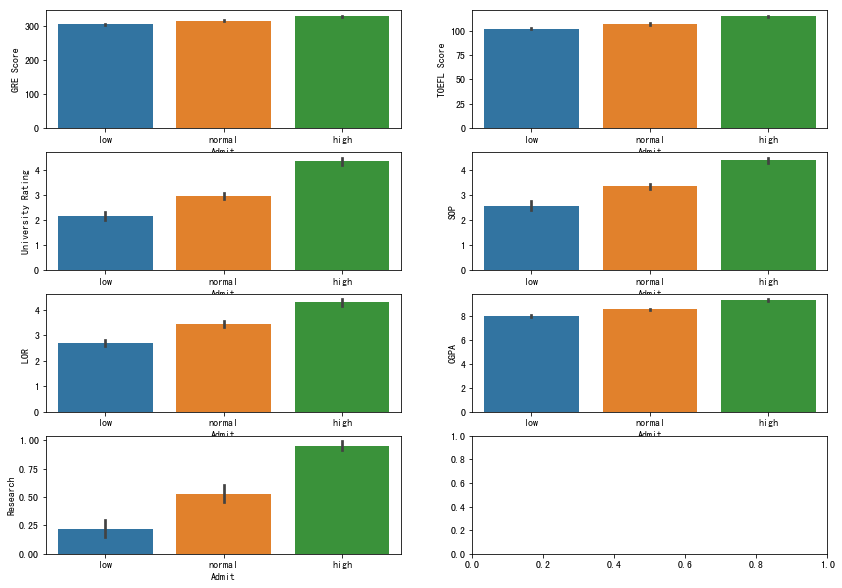

In [37]:
# 了解Admit与GRE Score,TOEFl Score,University Rating,SOP,LOR,CGPA,Research的相关性
fig,axes = plt.subplots(4,2,figsize=(14,10))
sns.barplot(x='Admit',y='GRE Score',data=df,order=['low','normal','high'],ax=axes[0,0])
sns.barplot(x='Admit',y='TOEFL Score',data=df,order=['low','normal','high'],ax=axes[0,1])
sns.barplot(x='Admit',y='University Rating',data=df,order=['low','normal','high'],ax=axes[1,0])
sns.barplot(x='Admit',y='SOP',data=df,order=['low','normal','high'],ax=axes[1,1])
sns.barplot(x='Admit',y='LOR ',data=df,order=['low','normal','high'],ax=axes[2,0])
sns.barplot(x='Admit',y='CGPA',data=df,order=['low','normal','high'],ax=axes[2,1])
sns.barplot(x='Admit',y='Research',data=df,order=['low','normal','high'],ax=axes[3,0])

In [36]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Admit'],
      dtype='object')

### 3.特征工程

In [38]:
# 特征工程
X = df.drop('Admit',axis=1)
Y = df['Admit']
X = pd.get_dummies(X)
X.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
5,6,330,115,5,4.5,3.0,9.34,1
6,7,321,109,3,3.0,4.0,8.20,1
7,8,308,101,2,3.0,4.0,7.90,0
8,9,302,102,1,2.0,1.5,8.00,0
9,10,323,108,3,3.5,3.0,8.60,0


### 4.机器学习建模 (逻辑回归模型）

In [40]:
# 机器学习建模
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 区分训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=10)
y_test.head(5)

332    normal
111    normal
352       low
205       low
56        low
Name: Admit, dtype: object

In [43]:
Logist = LogisticRegression()
Logist.fit(x_train,y_train)
predict = Logist.predict(x_test)
print('predict',predict)
score = accuracy_score(y_test,predict)
score

predict ['normal' 'high' 'normal' 'low' 'low' 'normal' 'high' 'high' 'high' 'high'
 'normal' 'high' 'normal' 'low' 'high' 'high' 'low' 'normal' 'normal'
 'normal' 'high' 'high' 'normal' 'normal' 'normal' 'normal' 'low' 'high'
 'normal' 'normal' 'high' 'low' 'normal' 'high' 'normal' 'high' 'low'
 'normal' 'normal' 'normal' 'high' 'normal' 'low' 'low' 'normal' 'high'
 'normal' 'normal' 'low' 'high' 'high' 'normal' 'high' 'high' 'low'
 'normal' 'normal' 'normal' 'normal' 'normal' 'low' 'high' 'normal'
 'normal' 'normal' 'normal' 'high' 'normal' 'high' 'high' 'high' 'normal'
 'normal' 'low' 'low' 'low' 'high' 'normal' 'low' 'low']


0.69999999999999996